<a href="https://colab.research.google.com/github/derickdilip2005/Car-resale-price-prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/manishkr1754/CarDekho_Used_Car_Price_Prediction/main/notebooks/data/cardekho_dataset.csv', index_col=0)
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [3]:
df.shape

(15411, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [5]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [6]:
df.isnull().sum()


,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0
engine,0


In [7]:
df['Fuel_Type_Petrol'] = df['fuel_type'].apply(lambda x: 1 if x == 'Petrol' else 0)
df['Fuel_Type_Diesel'] = df['fuel_type'].apply(lambda x: 1 if x == 'Diesel' else 0)
df['Seller_Type_Individual'] = df['seller_type'].apply(lambda x: 1 if x == 'Individual' else 0)
df['Transmission_Manual'] = df['transmission_type'].apply(lambda x: 1 if x == 'Manual' else 0)

In [8]:
df.drop(['fuel_type', 'seller_type', 'transmission_type', 'car_name', 'brand', 'model'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   vehicle_age             15411 non-null  int64  
 1   km_driven               15411 non-null  int64  
 2   mileage                 15411 non-null  float64
 3   engine                  15411 non-null  int64  
 4   max_power               15411 non-null  float64
 5   seats                   15411 non-null  int64  
 6   selling_price           15411 non-null  int64  
 7   Fuel_Type_Petrol        15411 non-null  int64  
 8   Fuel_Type_Diesel        15411 non-null  int64  
 9   Seller_Type_Individual  15411 non-null  int64  
 10  Transmission_Manual     15411 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.4 MB


In [56]:
df.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,Fuel_Type_Petrol,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,9,120000,19.70,796,46.30,5,120000,1,0,1,1
1,5,20000,18.90,1197,82.00,5,550000,1,0,1,1
2,11,60000,17.00,1197,80.00,5,215000,1,0,1,1
3,9,37000,20.92,998,67.10,5,226000,1,0,1,1
4,6,30000,22.77,1498,98.59,5,570000,0,1,0,1


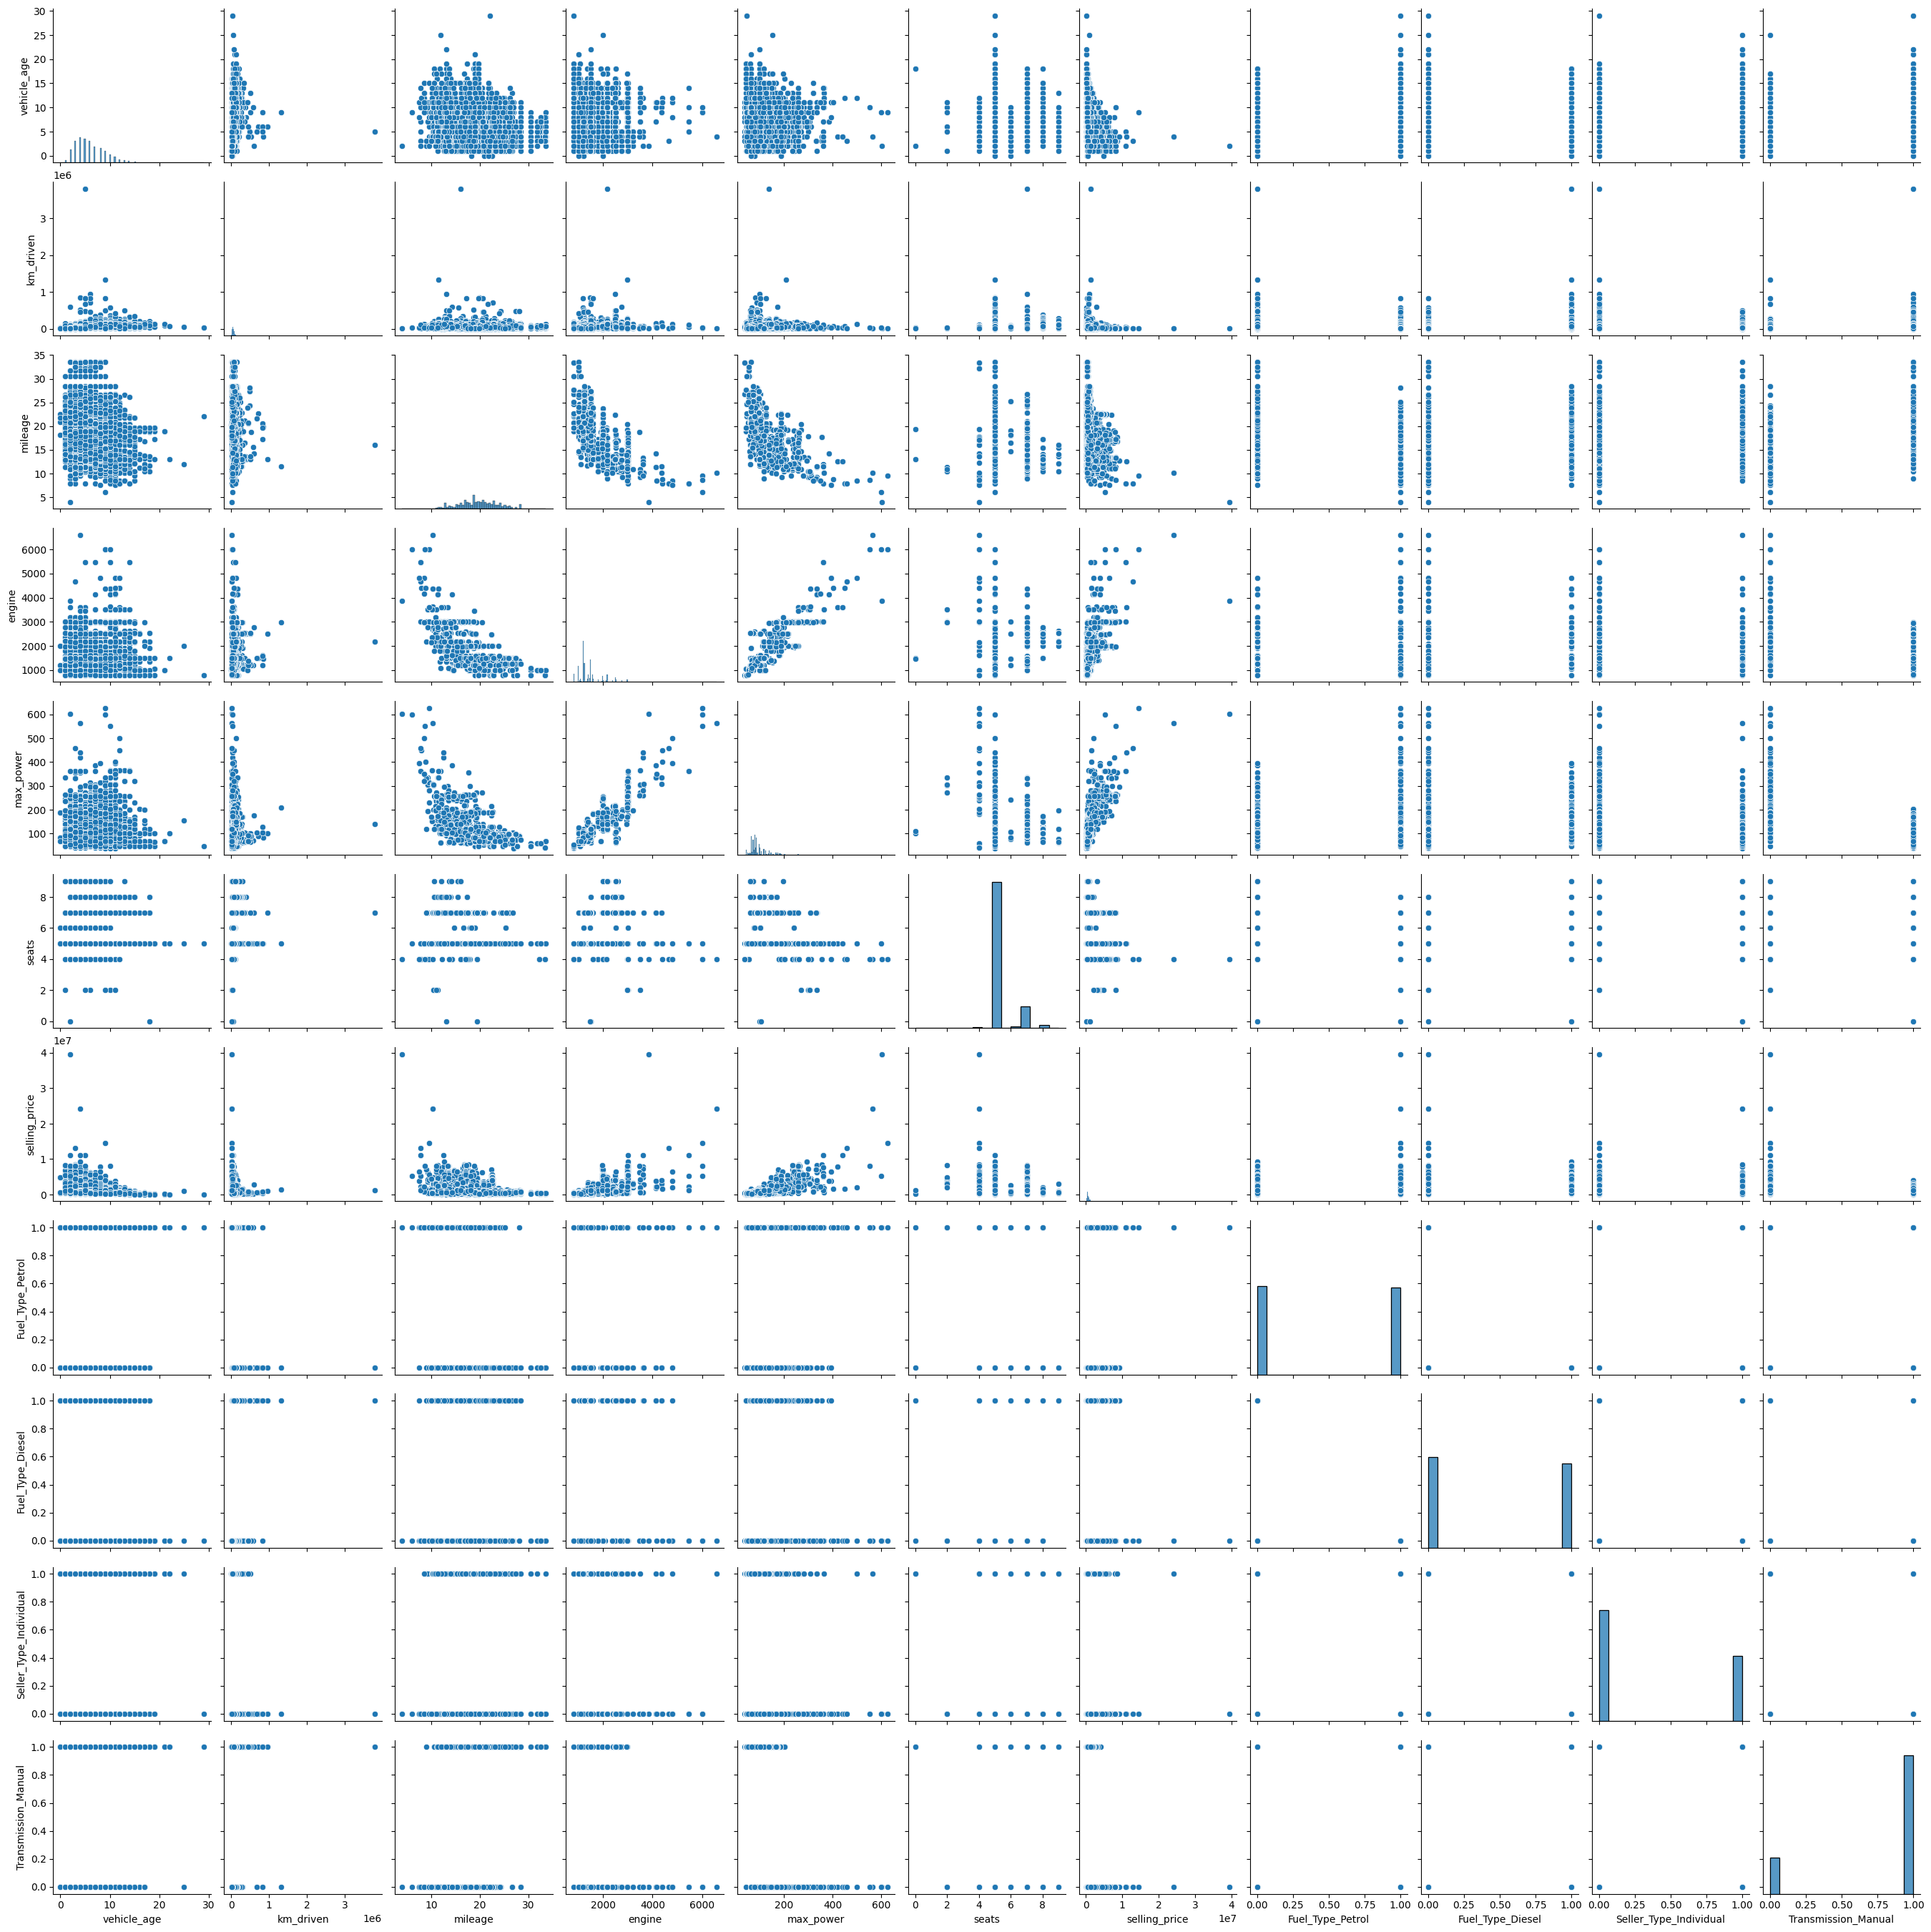

In [11]:
sns.pairplot(df)

<Axes: >

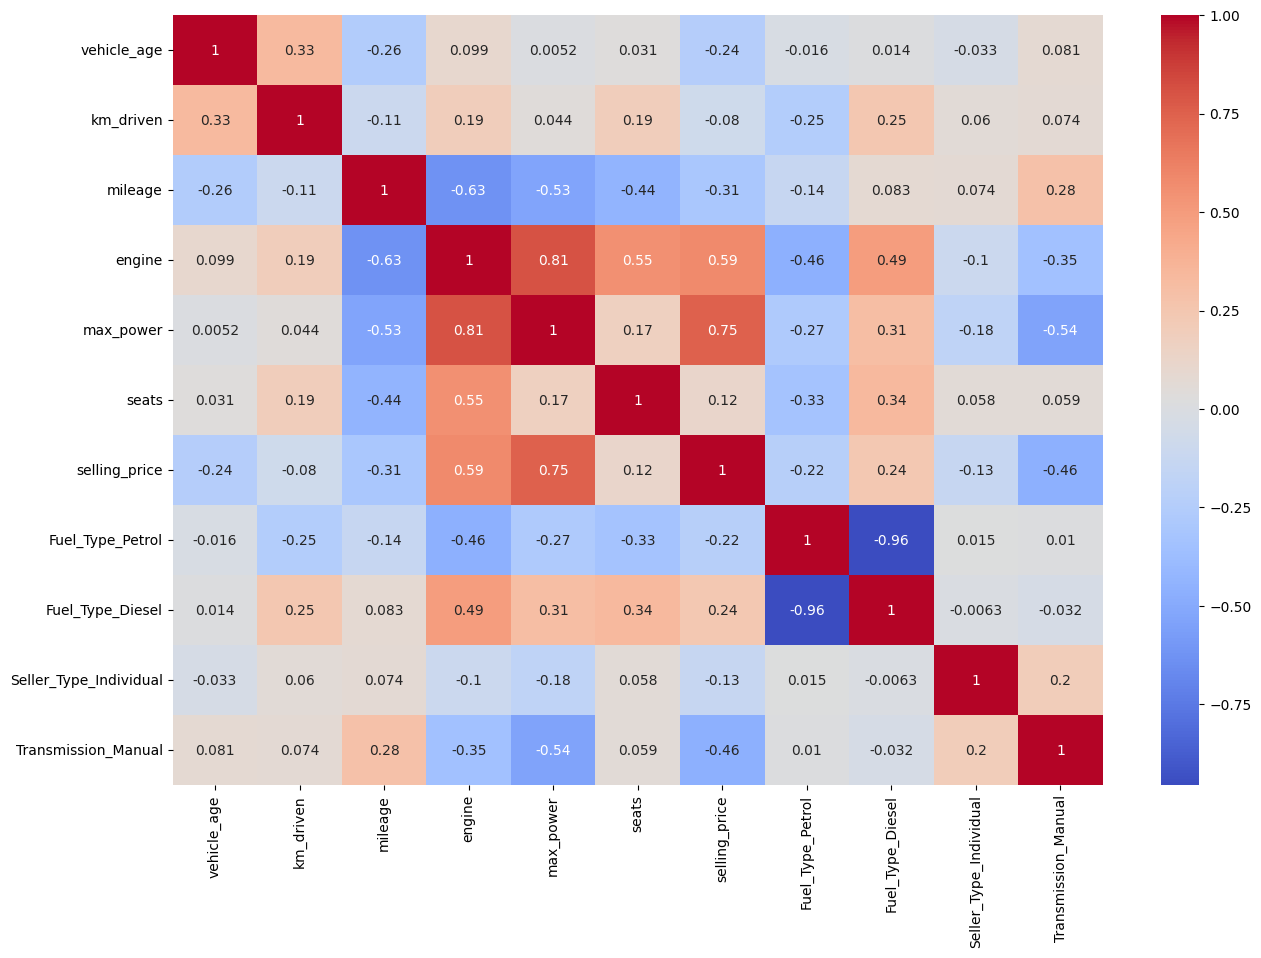

In [58]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

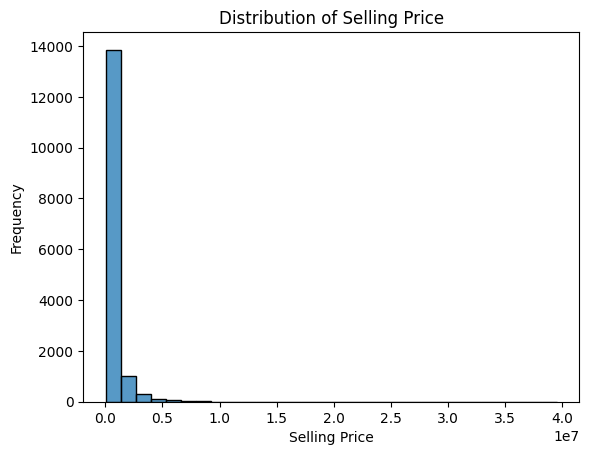

In [59]:
sns.histplot(df['selling_price'], bins=30)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Price')
plt.show()

Text(0, 0.5, 'Selling Price')

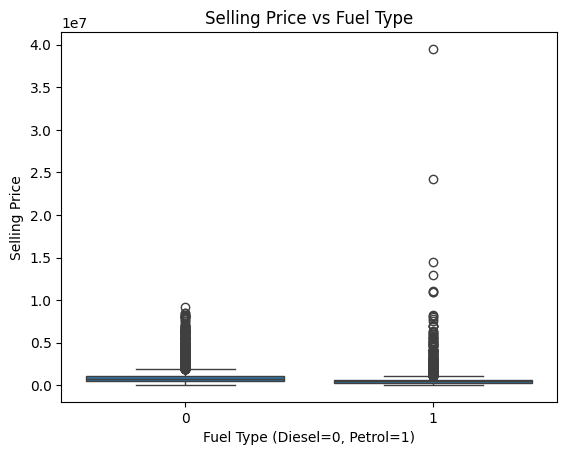

In [14]:
sns.boxplot(x='Fuel_Type_Petrol', y='selling_price', data=df)
plt.title('Selling Price vs Fuel Type')
plt.xlabel('Fuel Type (Diesel=0, Petrol=1)')
plt.ylabel('Selling Price')

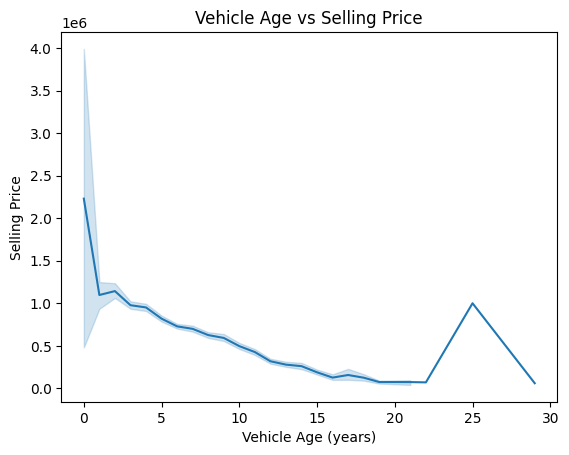

In [15]:
sns.lineplot(x='vehicle_age', y='selling_price', data=df)
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Selling Price')
plt.title('Vehicle Age vs Selling Price')
plt.show()

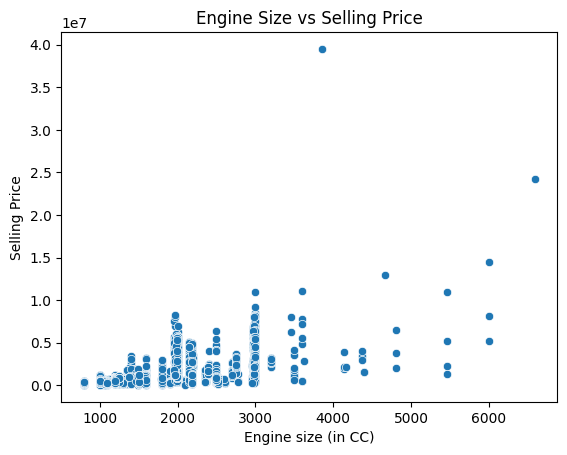

In [16]:
sns.scatterplot(x='engine', y='selling_price', data=df)
plt.xlabel('Engine size (in CC)')
plt.ylabel('Selling Price')
plt.title('Engine Size vs Selling Price')
plt.show()

In [23]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
y_pred = model.predict(X_test)

In [52]:
print('R2 Score:', r2_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.925586678307481
MSE: 56016993539.4975
Root Mean Squared Error: 236679.09400599264


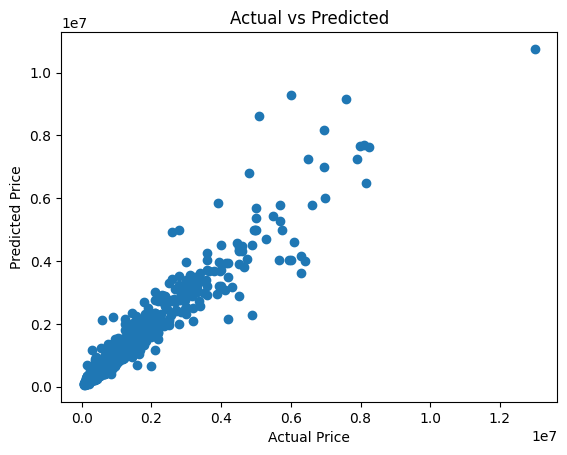

In [53]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()